# Loading the Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("emails.csv")
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [3]:
# Review important information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [4]:
# Check the distribution of the dataset into the labels 0 and 1
df.value_counts(["spam"])

spam
0       4360
1       1368
dtype: int64

In [5]:
# Drop entries with duplicate emails
df.drop_duplicates(["text"], ignore_index = True, inplace = True)
# Check total of entries remaining
len(df)

5695

# Process the Data

In [6]:
# Download NLTK data if first time
# import nltk
# nltk.download()

In [7]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [8]:
# Get the stopwords for English
words = stopwords.words("english")
# Add few more irrelevent words to this set
words.extend(["subject", "re"])

In [9]:
# Pipeline to clean each document/entry (remove punctuation, digits, stopwords, and stem)
def cleanMessage(message):
    # Tokenize
    tokens = word_tokenize(message)
    # Remove the punctuations and get the lowercase words
    t = str.maketrans("", "", string.punctuation)  # Translation table which removes punctuations from the string to be translated
    cleantokens = [word.translate(t).lower() for word in tokens if word.translate(t).isalpha()]
    cleanwords = [w for w in cleantokens if not w in words]
    # Return a string of space-separated clean words for the given message
    return " ".join(cleanwords)

In [10]:
# Clean each message and get a single string from all the cleaned messages corresponding to each label
label1Text = ""
label0Text = ""
for i, message in enumerate(df["text"]):
    cleanmessage = cleanMessage(message)
    # Modify the datapoint as well
    df.loc[i, "text"] = cleanmessage
    # Append to the final text
    if df.loc[i, "spam"] == 1:
        label1Text += cleanmessage + " "
    else:
        label0Text += cleanmessage + " "

In [11]:
label1Text = label1Text.rstrip()
label0Text = label0Text.rstrip()

# Word Cloud

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [13]:
# Get the word clouds
# Label 1
wordcloud1 = WordCloud(width = 600, height = 600, min_font_size = 20, background_color = "red", max_words = 1000).generate(label1Text)
# Label 0
wordcloud0 = WordCloud(width = 600, height = 600, min_font_size = 20, background_color = "green", max_words = 1000).generate(label0Text)

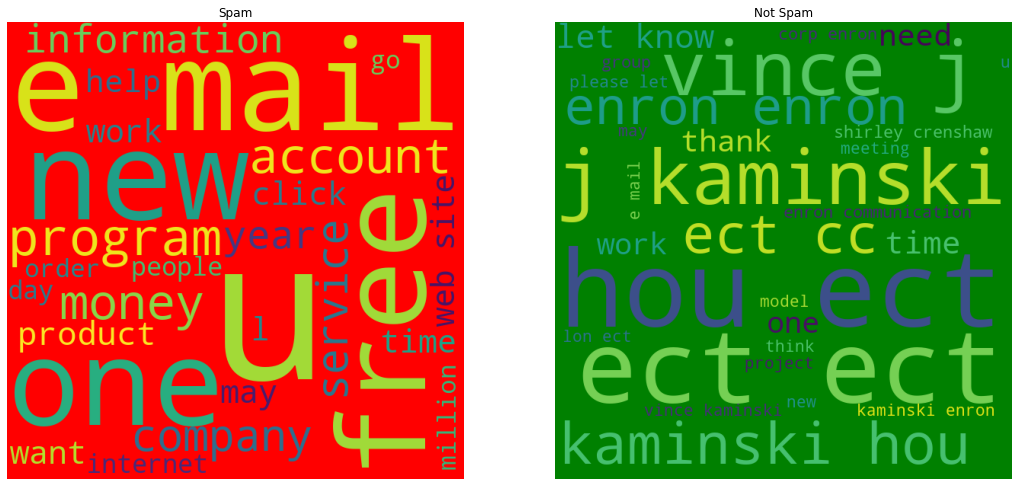

In [14]:
# Display the word clouds
plt.figure(figsize = (18, 9))
# Label 0
plt.subplot(121)
plt.title("Spam")
plt.axis(False)
plt.imshow(wordcloud1)
# Label 1
plt.subplot(122)
plt.title("Not Spam")
plt.axis(False)
plt.imshow(wordcloud0)
# Save as image
plt.savefig("wordcloud.png")
# Display
plt.show()

# Prepare Data for Spam Classification

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
# Turn the text data into numeric data using bag of words method
# Initialize the vectorizer
cv = CountVectorizer()
# Obtain the sparse matrix
textVector = cv.fit_transform(df["text"])

In [17]:
# Obatain the training and validation data
trainX, validX, trainy, validy = train_test_split(textVector, df["spam"], test_size = 0.3, random_state = 0)

# Train a Gradient Boosting Model for Classification

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

In [19]:
# Initiate the model
gbc = GradientBoostingClassifier(random_state = 0, verbose = 1)

In [20]:
# Train with training data
gbc.fit(trainX, trainy)

      Iter       Train Loss   Remaining Time 
         1           1.0027           11.97s
         2           0.9222           12.80s
         3           0.8562           12.05s
         4           0.8020           11.48s
         5           0.7563           11.54s
         6           0.7172           11.42s
         7           0.6834           11.13s
         8           0.6538           11.04s
         9           0.6281           10.81s
        10           0.6043           10.87s
        20           0.4598            9.93s
        30           0.3909            8.73s
        40           0.3458            7.47s
        50           0.3052            6.23s
        60           0.2777            4.98s
        70           0.2573            3.73s
        80           0.2391            2.48s
        90           0.2251            1.24s
       100           0.2118            0.00s


GradientBoostingClassifier(random_state=0, verbose=1)

# Test and Evaluate

In [21]:
from sklearn.metrics import classification_report

In [22]:
# Predict
yhat = gbc.predict(validX)

In [23]:
# Generate and view classification report (evaluation)
print(classification_report(validy, yhat))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1305
           1       0.95      0.89      0.92       404

    accuracy                           0.96      1709
   macro avg       0.96      0.94      0.95      1709
weighted avg       0.96      0.96      0.96      1709

